In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
src=cv2.imread('./data/lane.jpg')
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

cap=cv2.VideoCapture('./data/lane.mp4')
frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

while True:
    retval, frame=cap.read()
    if not retval:
        break
        
    cv2.imshow('frame',frame)
    
    key=cv2.waitKey(25)
    if key == 27:
        break
      
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

frame_size= (1280, 720)


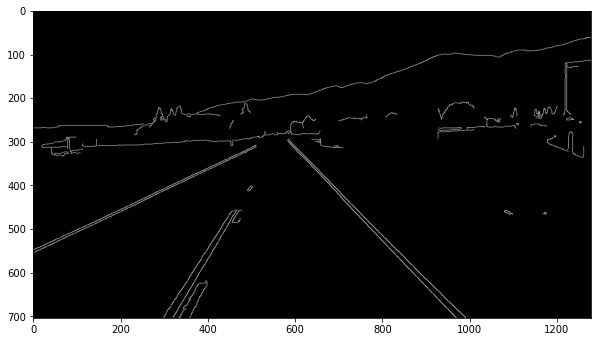

In [5]:
lane_image=src.copy()
gray=cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(5,5),0)
canny=cv2.Canny(blur,50,150)

plt.figure(figsize=(10,10))
plt.imshow(canny,cmap='gray')

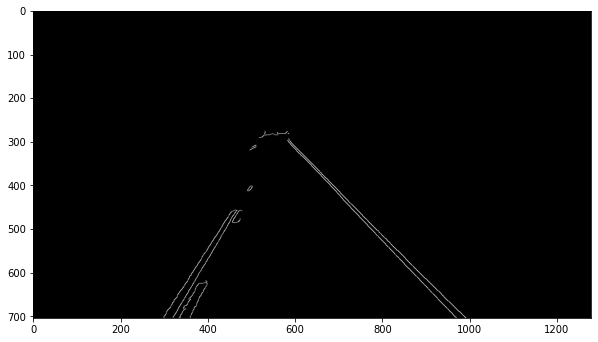

In [6]:
height=canny.shape[0]
triangle=np.array([[(200,height),(1100,height),(550,250)]])
mask=np.zeros_like(canny)
cv2.fillPoly(mask,triangle,255)
masked_image=cv2.bitwise_and(canny,mask)

plt.figure(figsize=(10,10))
plt.imshow(masked_image,cmap='gray')

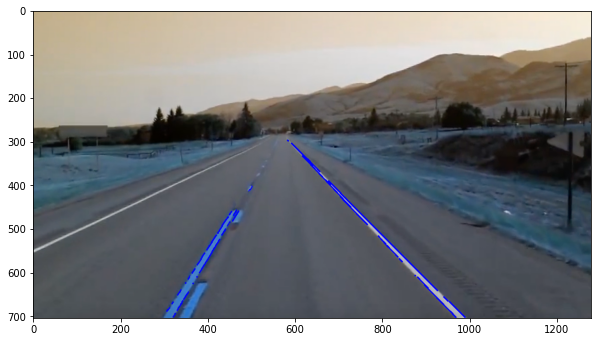

In [7]:
lines=cv2.HoughLinesP(masked_image,rho=2,theta=np.pi/180.0,threshold=100)

for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.figure(figsize=(10,10))
plt.imshow(src)

In [12]:
def LaneDetection(src,roi):
    # canny edge detection
    img=src.copy()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    
    # select ROI
    height=canny.shape[0]
    mask=np.zeros_like(canny)
    cv2.fillPoly(mask,roi,255)
    masked_image=cv2.bitwise_and(canny,mask)
    
    # line detection
    lines=cv2.HoughLinesP(masked_image,rho=1,theta=np.pi/180.0,threshold=100)
    
    # draw lane
    for line in lines:
        x1,y1,x2,y2=line[0]
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        
    return img

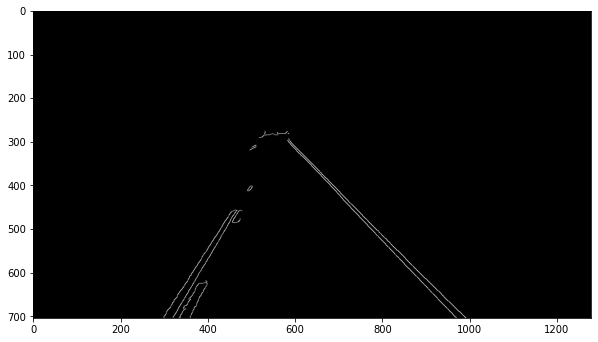

In [13]:
triangle=np.array([[(200,height),(1100,height),(550,250)]])
image=src.copy()
line_image=LaneDetection(image,triangle)

plt.figure(figsize=(10,10))
plt.imshow(masked_image,cmap='gray')

In [14]:
cap=cv2.VideoCapture('./data/lane.mp4')

frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

while True:
    retval, frame=cap.read()
    if not retval:
        break
    
    # lane detection
    lane=frame.copy()
    line_image=LaneDetection(lane,triangle)
    
    cv2.imshow('frame',frame)
    cv2.imshow('lane',line_image)
    
    key=cv2.waitKey(25)
    if key == 27:
        break
      
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

frame_size= (1280, 720)
